# Second Activity (IC2)

**Professor: Ricardo Prudêncio**

Task:

(PT-BR) Vamos trabalhar com o conjunto de dados artificial Two Moons, um problema de classificação binário não linear (ver notebook em anexo).

No notebook, inicialmente gerei 100 exemplos de treinamento para esse problema. Em seguida, treinei uma árvore de decisão usando  uma profundidade máxima de 5 nós e um número mínimo de 10 exemplos por nó terminal, visando diminuir a complexidade do modelo e evitar overfitting.

Para inspecionar a superfície de decisão definida pela árvore, gerei um conjunto de exemplos de teste gerado uniformemente e plotei as predições do modelo aprendido. Para um problema em duas dimensões isso é mais fácil, claro! :)

No final, avaliei a árvore no conjunto de treinamento e em um novo conjunto de teste, com resultados de acurácia em torno de 0.8. Tenho a impressão que dá pra melhorar isso.

Aproveita esse notebook e explore os seguintes pontos:  

a. Experimente treinar árvores de decisão, variando os parâmetros de profundidade máxima e do  número mínimo de exemplos por nó terminal, com o objetivo de melhorar os  resultados. 

b. Experimente valores extremos para observar overfitting.

c. Experimente retreinar a árvore de decisão mas usando agora um bom conjunto de exemplos de treinamento (digamos, 1000 exemplos). É bem possível que a chance de overfitting diminua nesse caso.
 
d. Vc pode realizar experimentos usando outros algoritmos e verificar a fronteira de decisão que eles criam. Façam
isso, por exemplo, com a regressão logística e o kNN.

(EN) 
Let's work with the artificial Two Moons dataset, a binary non-linear classification problem (see attached notebook).

In the notebook, I initially generated 100 training examples for this problem. Then, I trained a decision tree using a maximum depth of 5 nodes and a minimum of 10 examples per terminal node, aiming to reduce the model's complexity and avoid overfitting.

To inspect the decision boundary defined by the tree, I generated a set of uniformly distributed test examples and plotted the predictions of the learned model. This is easier for a two-dimensional problem, of course! :)

Finally, I evaluated the tree on the training set and a new test set, with accuracy results around 0.8. I have the impression that this can be improved.

Use this notebook to explore the following points:

a. Experiment with training decision trees, varying the parameters for maximum depth and the minimum number of examples per terminal node, with the goal of improving the results.

b. Try extreme values to observe overfitting.

c. Try retraining the decision tree using a larger set of training examples (say, 1000 examples). It is quite possible that the chance of overfitting will decrease in this case.

d. You can perform experiments using other algorithms and check the decision boundary they create. Do this, for example, with logistic regression and k-nearest neighbors (kNN).

## Base Notebook

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

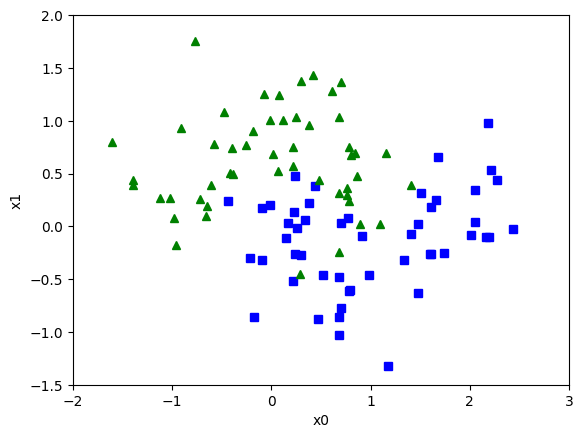

In [2]:
# 1- Generating a dataset.
from sklearn.datasets import make_moons

# X are the generated instances, an array of shape (100,2).
# y are the labels of X, with values of either 0 or 1.
X, Y = make_moons(n_samples=100, noise=0.3, random_state=14)

# 2- Visualizing the dataset.

# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bs")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "g^")

# X contains two features, x1 and x2
plt.xlabel("x0", fontsize=10)
plt.ylabel("x1", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,min_samples_leaf = 10)

model.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [4]:
n = 5000
xy_min = [-2, -1.5]
xy_max = [3, 2]

data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))

Yhat_new = model.predict(data)

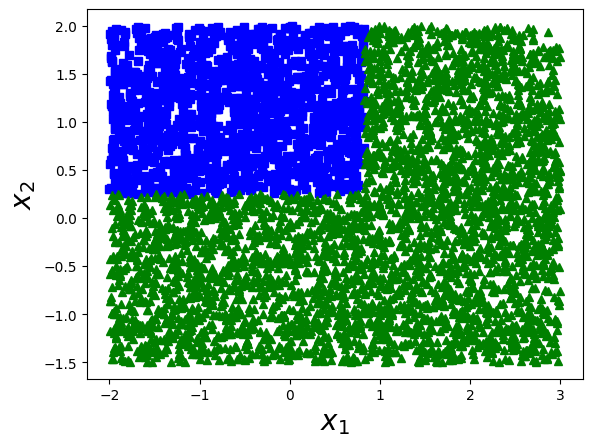

In [5]:
# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(data[:, 0][Yhat_new==0], data[:, 1][Yhat_new==0], "bs")
plt.plot(data[:, 0][Yhat_new==1], data[:, 1][Yhat_new==1], "g^")


# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()

In [6]:
from sklearn.metrics import accuracy_score

Yhat = model.predict(X)

accuracy_score(Y,Yhat)


0.85

In [7]:
X_test, Y_test = make_moons(n_samples=500, noise=0.3, random_state=42)

Yhat_test = model.predict(X_test)

accuracy_score(Y_test,Yhat_test)

0.798

## Resolution

#### a. Experiment with training decision trees, varying the parameters for maximum depth and the minimum number of examples per terminal node, with the goal of improving the results.

We are going to use Optuna in order to tweak the hyper-parameters and get the best metric values.

In [8]:
import optuna
from sklearn.model_selection import cross_val_score

c:\Users\gvasc\anaconda3\envs\langchain\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# We already have X and y set.


# We define the callback function to store the best model
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_model", value=trial.user_attrs["best_model"])

In [10]:
# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    max_depth = trial.suggest_int('max_depth', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    # Create the Decision Tree model with the suggested hyperparameters
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    
    # Train the model and evaluate it using cross-validation
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy').mean()
    
    # Fit the model on the entire dataset for the best trial
    model.fit(X, Y)
    
    # Store the trained model in the trial
    trial.set_user_attr("best_model", model)
    
    return score

In [11]:
# Create an Optuna study
study = optuna.create_study(direction='maximize')

[I 2024-09-02 09:41:51,492] A new study created in memory with name: no-name-1cf9e813-2bb4-4cfc-8103-57ba4476e822


In [12]:
# Optimize the study
study.optimize(objective, n_trials=50, callbacks=[callback])

[I 2024-09-02 09:41:51,508] Trial 0 finished with value: 0.8399999999999999 and parameters: {'max_depth': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8399999999999999.
[I 2024-09-02 09:41:51,515] Trial 1 finished with value: 0.8799999999999999 and parameters: {'max_depth': 9, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8799999999999999.
[I 2024-09-02 09:41:51,523] Trial 2 finished with value: 0.85 and parameters: {'max_depth': 7, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8799999999999999.
[I 2024-09-02 09:41:51,528] Trial 3 finished with value: 0.8200000000000001 and parameters: {'max_depth': 2, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.8799999999999999.
[I 2024-09-02 09:41:51,535] Trial 4 finished with value: 0.8300000000000001 and parameters: {'max_depth': 9, 'min_samples_leaf': 18}. Best is trial 1 with value: 0.8799999999999999.
[I 2024-09-02 09:41:51,542] Trial 5 finished with value: 0.7700000000000001 and parameters: {'max_depth': 4,

In [13]:
# Get the best model
best_model = study.user_attrs["best_model"]

Here we have the optimal hyperparameters calculated through this method.

In [14]:
# Print best hyperparameters
print("Best Hyperparameters:")
print(f"Max Depth: {study.best_params['max_depth']}")
print(f"Min Samples Leaf: {study.best_params['min_samples_leaf']}")

Best Hyperparameters:
Max Depth: 10
Min Samples Leaf: 1


In [15]:
# Generate test data for visualization
n = 5000
xy_min = [-2, -1.5]
xy_max = [3, 2]

data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))

Yhat_new = model.predict(data)

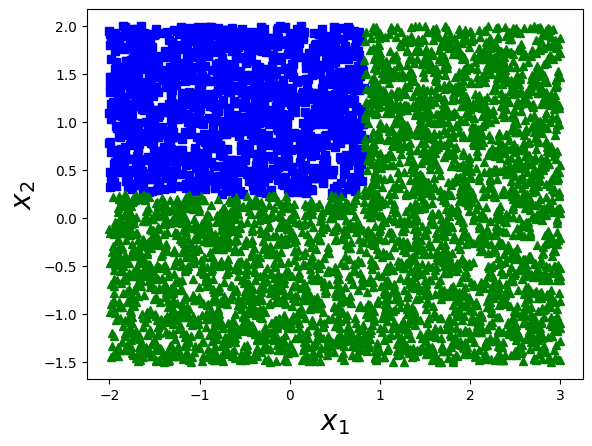

In [16]:
# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(data[:, 0][Yhat_new==0], data[:, 1][Yhat_new==0], "bs")
plt.plot(data[:, 0][Yhat_new==1], data[:, 1][Yhat_new==1], "g^")


# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()

In [17]:
# Evaluate the best model on the training set
Yhat_train = best_model.predict(X)
train_accuracy = accuracy_score(Y, Yhat_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 1.00


We can see that, just by tweaking the hyperparameters, we already got a much better result for the test set.

In [18]:
# Evaluate the best model on the test set
Yhat_test = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Yhat_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.90


#### b. Try extreme values to observe overfitting.

In [19]:
# 2- Train a Decision Tree with extreme parameters to observe overfitting
# Set max_depth to a very large value and min_samples_leaf to a very small value
extreme_model = DecisionTreeClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=1)

# Fit the model to the training data
extreme_model.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=1000)

In [20]:
# 3- Visualize the decision boundary
n = 5000
xy_min = [-2, -1.5]
xy_max = [3, 2]
data = np.random.uniform(low=xy_min, high=xy_max, size=(n, 2))

Yhat_new = extreme_model.predict(data)

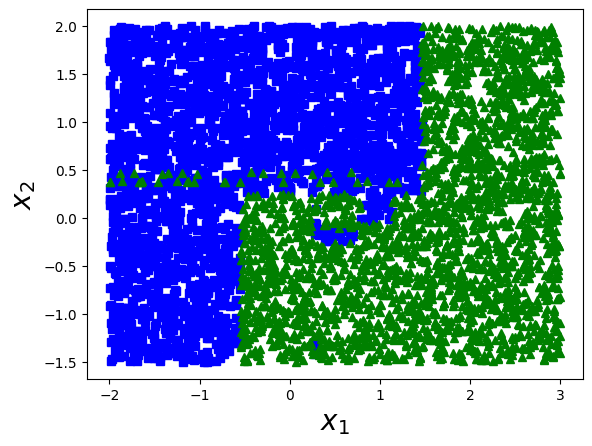

In [21]:
# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(data[:, 0][Yhat_new==0], data[:, 1][Yhat_new==0], "bs")
plt.plot(data[:, 0][Yhat_new==1], data[:, 1][Yhat_new==1], "g^")


# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()

In [22]:
# 4- Evaluate the model on the training set
Yhat_train = extreme_model.predict(X)
train_accuracy = accuracy_score(Y, Yhat_train)
print(f"Training Accuracy with Extreme Values: {train_accuracy:.2f}")

Training Accuracy with Extreme Values: 1.00


Once we try to force overfitting, since the dataset is not a complex one, even when we have a perfect score for the training set, we also have a relatively good performance for the test set.

In [23]:
# Evaluate the model on the test set
Yhat_test = extreme_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Yhat_test)
print(f"Test Accuracy with Extreme Values: {test_accuracy:.2f}")

Test Accuracy with Extreme Values: 0.88


#### c. Try retraining the decision tree using a larger set of training examples (say, 1000 examples). It is quite possible that the chance of overfitting will decrease in this case.

In [24]:
# 1- Generating a larger dataset (1000 examples)
X_large, Y_large = make_moons(n_samples=1000, noise=0.3, random_state=14)

In [25]:
# 2- Train a Decision Tree with the larger dataset
# Use reasonable hyperparameters to avoid overfitting and underfitting
larger_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [26]:
# Fit the model to the larger training data
larger_model.fit(X_large, Y_large)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [27]:
# 3- Visualize the decision boundary with the larger dataset
n = 5000
xy_min = [-2, -1.5]
xy_max = [3, 2]
data = np.random.uniform(low=xy_min, high=xy_max, size=(n, 2))

Yhat_new = larger_model.predict(data)

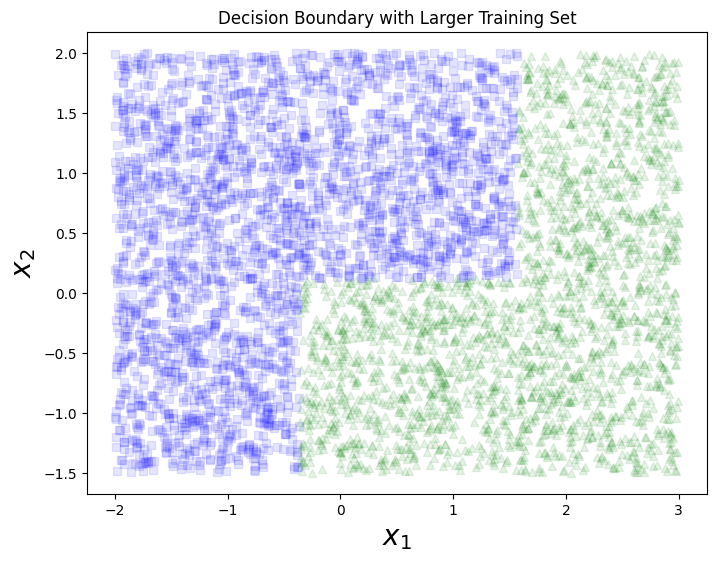

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(data[:, 0][Yhat_new == 0], data[:, 1][Yhat_new == 0], "bs", alpha=0.1)
plt.plot(data[:, 0][Yhat_new == 1], data[:, 1][Yhat_new == 1], "g^", alpha=0.1)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.title("Decision Boundary with Larger Training Set")
plt.show()

In [29]:
# 4- Evaluate the model on the larger training set
Yhat_train_large = larger_model.predict(X_large)
train_accuracy_large = accuracy_score(Y_large, Yhat_train_large)
print(f"Training Accuracy with Larger Training Set: {train_accuracy_large:.2f}")

Training Accuracy with Larger Training Set: 0.89


We can see that, with a bigger number of examples, we may have a slight increase for the testing set performance.

In [30]:
# Evaluate the model on the test set
Yhat_test_large = larger_model.predict(X_test)
test_accuracy_large = accuracy_score(Y_test, Yhat_test_large)
print(f"Test Accuracy with Larger Training Set: {test_accuracy_large:.2f}")

Test Accuracy with Larger Training Set: 0.89


#### d. You can perform experiments using other algorithms and check the decision boundary they create. Do this, for example, with logistic regression and k-nearest neighbors (kNN).

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# 1- Generating the dataset
X, Y = make_moons(n_samples=100, noise=0.3, random_state=14)

In [33]:
# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, Y):
    n = 5000
    xy_min = [-2, -1.5]
    xy_max = [3, 2]
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n, 2))
    
    Yhat_new = model.predict(data)
    
    # When the label y is 0, the class is represented with a blue square.
    # When the label y is 1, the class is represented with a green triangle.
    plt.plot(data[:, 0][Yhat_new == 0], data[:, 1][Yhat_new == 0], "bs")
    plt.plot(data[:, 0][Yhat_new == 1], data[:, 1][Yhat_new == 1], "g^")
    
    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

In [34]:
# 2- Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)
dt_model.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [35]:
# 3- Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X, Y)

LogisticRegression()

In [36]:
# 4- Train k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, Y)

KNeighborsClassifier()

Decision Boundary for Decision Tree:


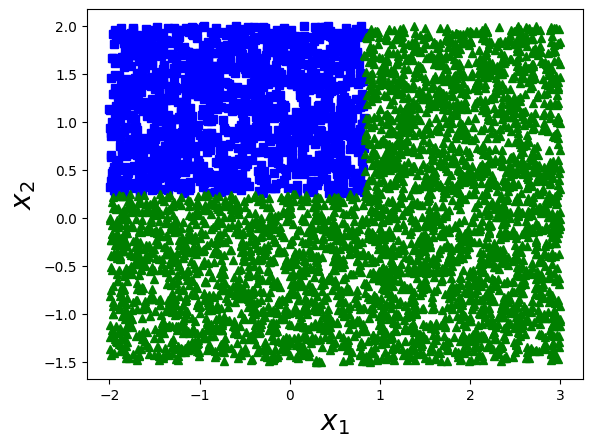

Decision Boundary for Logistic Regression:


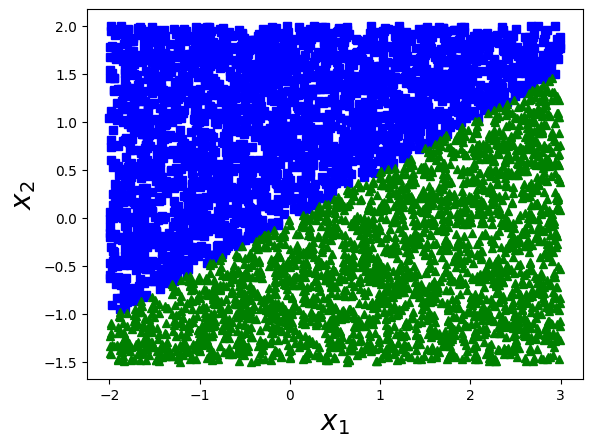

Decision Boundary for k-Nearest Neighbors (k=5):


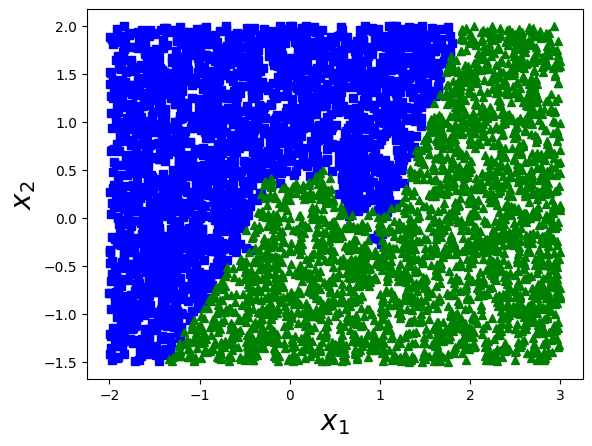

In [37]:
# 5- Create plots for each model's decision boundary
print("Decision Boundary for Decision Tree:")
plot_decision_boundary(dt_model, X, Y)

print("Decision Boundary for Logistic Regression:")
plot_decision_boundary(lr_model, X, Y)

print("Decision Boundary for k-Nearest Neighbors (k=5):")
plot_decision_boundary(knn_model, X, Y)

In [38]:
# 6- Evaluate each model on a new test set
X_test, Y_test = make_moons(n_samples=500, noise=0.3, random_state=42)

Here are the final results for trials in different models. For this problem, KNNs usually tend to perform better.

In [39]:
# Evaluate Decision Tree
Yhat_test_dt = dt_model.predict(X_test)
test_accuracy_dt = accuracy_score(Y_test, Yhat_test_dt)
print(f"Decision Tree Test Accuracy: {test_accuracy_dt:.2f}")

# Evaluate Logistic Regression
Yhat_test_lr = lr_model.predict(X_test)
test_accuracy_lr = accuracy_score(Y_test, Yhat_test_lr)
print(f"Logistic Regression Test Accuracy: {test_accuracy_lr:.2f}")

# Evaluate k-Nearest Neighbors
Yhat_test_knn = knn_model.predict(X_test)
test_accuracy_knn = accuracy_score(Y_test, Yhat_test_knn)
print(f"k-Nearest Neighbors Test Accuracy: {test_accuracy_knn:.2f}")

Decision Tree Test Accuracy: 0.80
Logistic Regression Test Accuracy: 0.84
k-Nearest Neighbors Test Accuracy: 0.91


##### Additional KAN (Kolmogorov-Arnold Network) Trial

KANs, or Kolmogorov Networks, are a relatively new concept in machine learning and artificial intelligence. They are a type of neural network architecture inspired by Andrey Kolmogorov's work on function approximation. The key ideas behind KANs are:

1. Universal approximation: KANs are designed to approximate any continuous function, similar to how Kolmogorov's theorem states that any multivariate continuous function can be represented as a composition of simpler functions.

2. Hierarchical structure: They use a hierarchical structure of simple functions to build complex mappings between inputs and outputs.

3. Interpretability: Unlike traditional neural networks, KANs aim to be more interpretable by using simpler, more understandable building blocks.

4. Efficiency: KANs potentially require fewer parameters than traditional neural networks to achieve similar performance on certain tasks.

5. Theoretical foundation: They are grounded in mathematical theory, specifically Kolmogorov's superposition theorem, which gives them a strong theoretical basis.

Kolmogorov Networks (KANs) offer several potential advantages over traditional Multilayer Perceptrons (MLPs). KANs are grounded in Kolmogorov's superposition theorem, providing a stronger theoretical foundation for their universal approximation capabilities. They aim to be more interpretable due to their hierarchical structure of simpler functions, potentially addressing the "black box" problem common in deep MLPs. KANs are designed to achieve similar performance with fewer parameters, possibly leading to more efficient models. Their use of explicit function composition aligns more closely with how many mathematical problems are naturally expressed. KANs have more precise theoretical guarantees about their approximation capabilities and may offer better generalization on problems with inherent hierarchical structure.

Here, we do an implementation in PyTorch to test out this new approach and see how it performs.

First, let's see how a KAN with 2 hidden layers perform.

Epoch [10/100], Loss: 0.2423
Epoch [20/100], Loss: 0.2520
Epoch [30/100], Loss: 0.2290
Epoch [40/100], Loss: 0.2264
Epoch [50/100], Loss: 0.2299
Epoch [60/100], Loss: 0.2343
Epoch [70/100], Loss: 0.2229
Epoch [80/100], Loss: 0.2170
Epoch [90/100], Loss: 0.2250
Epoch [100/100], Loss: 0.2070
Visualizing Layer Outputs:


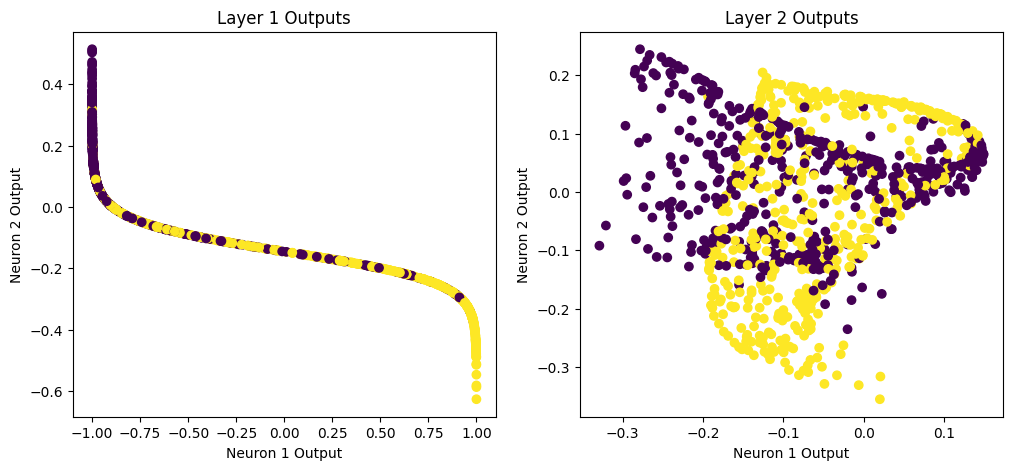

Test Accuracy: 0.91
Decision Boundary for KAN-like Network:


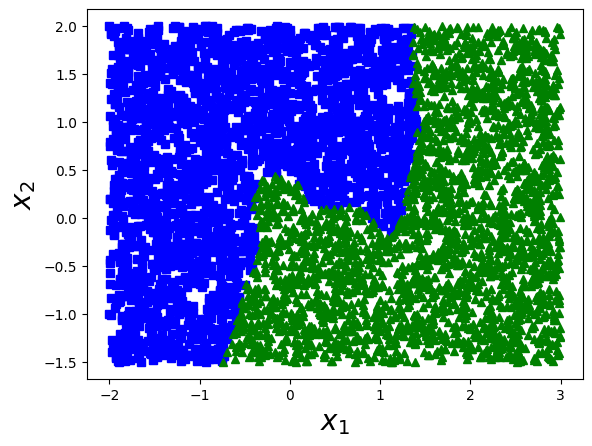

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

# 1- Generating the dataset
X, Y = make_moons(n_samples=1000, noise=0.3, random_state=14)
X_test, Y_test = make_moons(n_samples=500, noise=0.3, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32)
Y_train = torch.tensor(Y, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.long)

# 2- Define a KAN-like neural network using PyTorch
class KANLikeNetwork(nn.Module):
    def __init__(self):
        super(KANLikeNetwork, self).__init__()
        # Define the layers of the network
        self.layer1 = nn.Linear(2, 64)
        self.layer2 = nn.Linear(64, 64)
        self.layer3 = nn.Linear(64, 2)
        
    def forward(self, x):
        # Apply transformations that mimic univariate representations
        x = torch.tanh(self.layer1(x))  # Apply non-linearity after first layer
        self.layer1_output = x.detach().numpy()  # Store the output after layer1 for visualization
        x = torch.tanh(self.layer2(x))  # Second layer transformation
        self.layer2_output = x.detach().numpy()  # Store the output after layer2 for visualization
        x = self.layer3(x)  # Output layer (linear)
        return x

# 3- Instantiate the model, define loss function and optimizer
model = KANLikeNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4- Train the model
epochs = 100
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# 5- Visualize the layer outputs
def visualize_layer_outputs(model, X):
    model.eval()
    with torch.no_grad():
        model(X)  # Forward pass to store intermediate outputs

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    ax[0].scatter(model.layer1_output[:, 0], model.layer1_output[:, 1], c=Y, cmap='viridis')
    ax[0].set_title('Layer 1 Outputs')
    ax[0].set_xlabel('Neuron 1 Output')
    ax[0].set_ylabel('Neuron 2 Output')

    ax[1].scatter(model.layer2_output[:, 0], model.layer2_output[:, 1], c=Y, cmap='viridis')
    ax[1].set_title('Layer 2 Outputs')
    ax[1].set_xlabel('Neuron 1 Output')
    ax[1].set_ylabel('Neuron 2 Output')

    plt.show()

# Visualize the outputs after each layer
print("Visualizing Layer Outputs:")
visualize_layer_outputs(model, X_train)

# 6- Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    test_accuracy = accuracy_score(Y_test, predicted)
    print(f"Test Accuracy: {test_accuracy:.2f}")

# 7- Visualize the decision boundary
def plot_decision_boundary(model, X, Y):
    n = 5000
    xy_min = [-2, -1.5]
    xy_max = [3, 2]
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n, 2))
    
    data_tensor = torch.tensor(data, dtype=torch.float32)
    with torch.no_grad():
        Yhat_new = model(data_tensor)
        _, Yhat_new = torch.max(Yhat_new, 1)
        Yhat_new = Yhat_new.numpy()
    
    # When the label y is 0, the class is represented with a blue square.
    # When the label y is 1, the class is represented with a green triangle.
    plt.plot(data[:, 0][Yhat_new == 0], data[:, 1][Yhat_new == 0], "bs")
    plt.plot(data[:, 0][Yhat_new == 1], data[:, 1][Yhat_new == 1], "g^")
    
    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

print("Decision Boundary for KAN-like Network:")
plot_decision_boundary(model, X, Y)

Appendix: The last plot in our visualization (plot_decision_boundary function) represents the final output of the model.

Decision Boundary of the Model: It shows the decision boundary learned by the model after training. This boundary is the result of all the transformations applied by both layers in the network.
Classification Results: The final output layer (output_layer) provides the model's predicted class for any given input. The decision boundary is visualized by classifying a grid of points across the input space and plotting the regions where the model predicts different classes.

Now, let's see how a KAN with 5 hidden layers perform.

Epoch [10/100], Loss: 0.3019
Epoch [20/100], Loss: 0.3312
Epoch [30/100], Loss: 0.2851
Epoch [40/100], Loss: 0.2675
Epoch [50/100], Loss: 0.2666
Epoch [60/100], Loss: 0.3034
Epoch [70/100], Loss: 0.2714
Epoch [80/100], Loss: 0.2714
Epoch [90/100], Loss: 0.2795
Epoch [100/100], Loss: 0.2330
Visualizing Layer Outputs for Deeper Network:


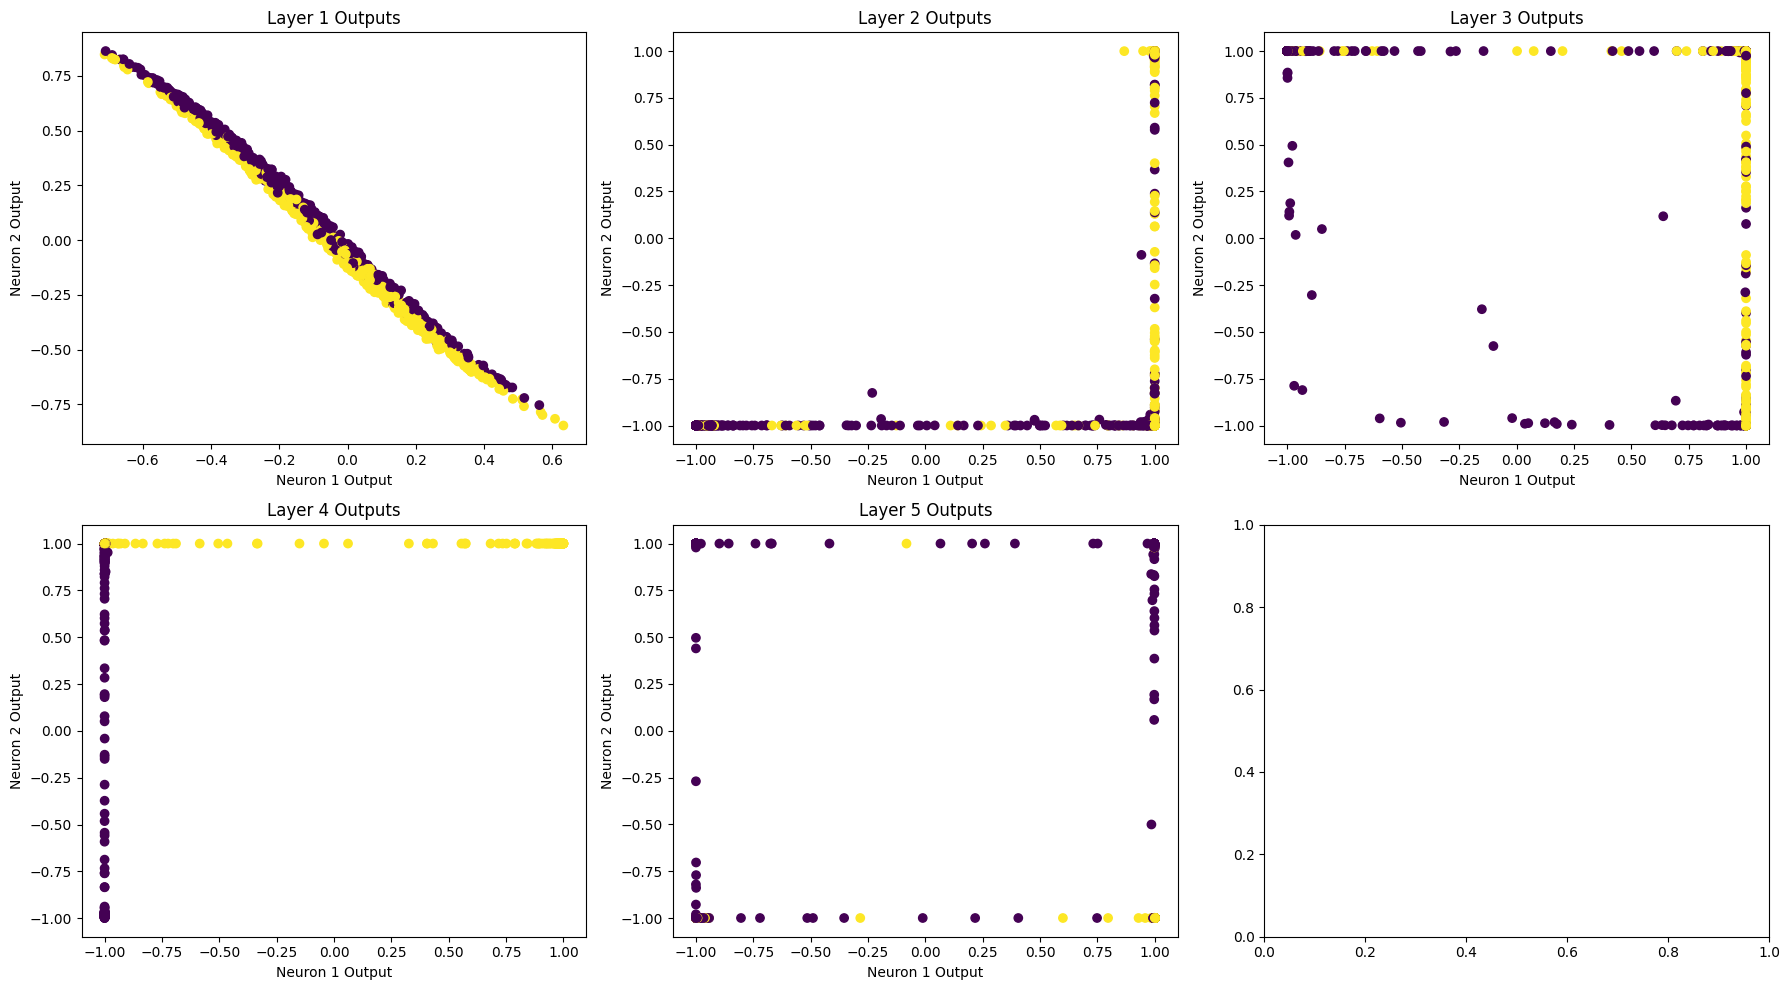

Test Accuracy with Deeper Network: 0.91
Decision Boundary for Deeper KAN-like Network:


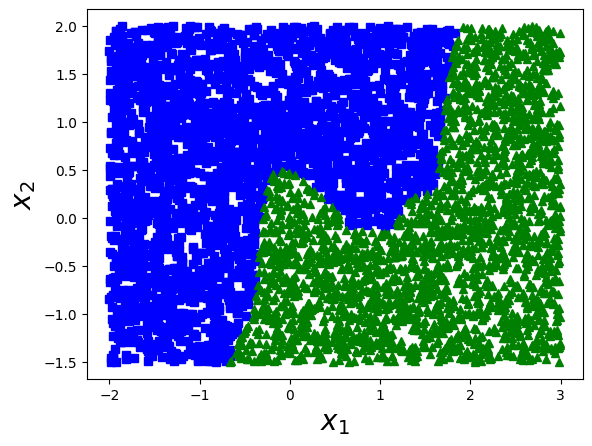

In [41]:
# 1- Generating the dataset
X, Y = make_moons(n_samples=1000, noise=0.3, random_state=14)
X_test, Y_test = make_moons(n_samples=500, noise=0.3, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32)
Y_train = torch.tensor(Y, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.long)

# 2- Define a deeper KAN-like neural network using PyTorch
class KANLikeNetworkDeeper(nn.Module):
    def __init__(self):
        super(KANLikeNetworkDeeper, self).__init__()
        # Define the layers of the network
        self.layer1 = nn.Linear(2, 64)
        self.layer2 = nn.Linear(64, 64)
        self.layer3 = nn.Linear(64, 64)
        self.layer4 = nn.Linear(64, 64)
        self.layer5 = nn.Linear(64, 64)
        self.layer6 = nn.Linear(64, 2)
        
    def forward(self, x):
        # Apply transformations that mimic univariate representations
        x = torch.tanh(self.layer1(x))  # Apply non-linearity after first layer
        self.layer1_output = x.detach().numpy()  # Store the output after layer1 for visualization
        x = torch.tanh(self.layer2(x))  # Second layer transformation
        self.layer2_output = x.detach().numpy()  # Store the output after layer2 for visualization
        x = torch.tanh(self.layer3(x))  # Third layer transformation
        self.layer3_output = x.detach().numpy()  # Store the output after layer3 for visualization
        x = torch.tanh(self.layer4(x))  # Fourth layer transformation
        self.layer4_output = x.detach().numpy()  # Store the output after layer4 for visualization
        x = torch.tanh(self.layer5(x))  # Fifth layer transformation
        self.layer5_output = x.detach().numpy()  # Store the output after layer5 for visualization
        x = self.layer6(x)  # Output layer (linear)
        return x

# 3- Instantiate the deeper model, define loss function and optimizer
model_deeper = KANLikeNetworkDeeper()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deeper.parameters(), lr=0.01)

# 4- Train the deeper model
epochs = 100
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    model_deeper.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model_deeper(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# 5- Visualize the layer outputs
def visualize_layer_outputs(model, X):
    model.eval()
    with torch.no_grad():
        model(X)  # Forward pass to store intermediate outputs

    fig, ax = plt.subplots(2, 3, figsize=(18, 10))
    
    ax[0, 0].scatter(model.layer1_output[:, 0], model.layer1_output[:, 1], c=Y, cmap='viridis')
    ax[0, 0].set_title('Layer 1 Outputs')
    ax[0, 0].set_xlabel('Neuron 1 Output')
    ax[0, 0].set_ylabel('Neuron 2 Output')

    ax[0, 1].scatter(model.layer2_output[:, 0], model.layer2_output[:, 1], c=Y, cmap='viridis')
    ax[0, 1].set_title('Layer 2 Outputs')
    ax[0, 1].set_xlabel('Neuron 1 Output')
    ax[0, 1].set_ylabel('Neuron 2 Output')

    ax[0, 2].scatter(model.layer3_output[:, 0], model.layer3_output[:, 1], c=Y, cmap='viridis')
    ax[0, 2].set_title('Layer 3 Outputs')
    ax[0, 2].set_xlabel('Neuron 1 Output')
    ax[0, 2].set_ylabel('Neuron 2 Output')

    ax[1, 0].scatter(model.layer4_output[:, 0], model.layer4_output[:, 1], c=Y, cmap='viridis')
    ax[1, 0].set_title('Layer 4 Outputs')
    ax[1, 0].set_xlabel('Neuron 1 Output')
    ax[1, 0].set_ylabel('Neuron 2 Output')

    ax[1, 1].scatter(model.layer5_output[:, 0], model.layer5_output[:, 1], c=Y, cmap='viridis')
    ax[1, 1].set_title('Layer 5 Outputs')
    ax[1, 1].set_xlabel('Neuron 1 Output')
    ax[1, 1].set_ylabel('Neuron 2 Output')

    plt.tight_layout()
    plt.show()

# Visualize the outputs after each layer
print("Visualizing Layer Outputs for Deeper Network:")
visualize_layer_outputs(model_deeper, X_train)

# 6- Evaluate the deeper model on the test set
model_deeper.eval()
with torch.no_grad():
    test_outputs = model_deeper(X_test)
    _, predicted = torch.max(test_outputs, 1)
    test_accuracy = accuracy_score(Y_test, predicted)
    print(f"Test Accuracy with Deeper Network: {test_accuracy:.2f}")

# 7- Visualize the decision boundary
def plot_decision_boundary(model, X, Y):
    n = 5000
    xy_min = [-2, -1.5]
    xy_max = [3, 2]
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n, 2))
    
    data_tensor = torch.tensor(data, dtype=torch.float32)
    with torch.no_grad():
        Yhat_new = model(data_tensor)
        _, Yhat_new = torch.max(Yhat_new, 1)
        Yhat_new = Yhat_new.numpy()
    
    # When the label y is 0, the class is represented with a blue square.
    # When the label y is 1, the class is represented with a green triangle.
    plt.plot(data[:, 0][Yhat_new == 0], data[:, 1][Yhat_new == 0], "bs")
    plt.plot(data[:, 0][Yhat_new == 1], data[:, 1][Yhat_new == 1], "g^")
    
    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

print("Decision Boundary for Deeper KAN-like Network:")
plot_decision_boundary(model_deeper, X, Y)

We can try out the same network again to see if it learns new functions througout it's learning.

Epoch [10/100], Loss: 0.2846
Epoch [20/100], Loss: 0.2662
Epoch [30/100], Loss: 0.2943
Epoch [40/100], Loss: 0.3288
Epoch [50/100], Loss: 0.2544
Epoch [60/100], Loss: 0.2670
Epoch [70/100], Loss: 0.2625
Epoch [80/100], Loss: 0.2601
Epoch [90/100], Loss: 0.2647
Epoch [100/100], Loss: 0.2675
Visualizing Layer Outputs for Deeper Network:


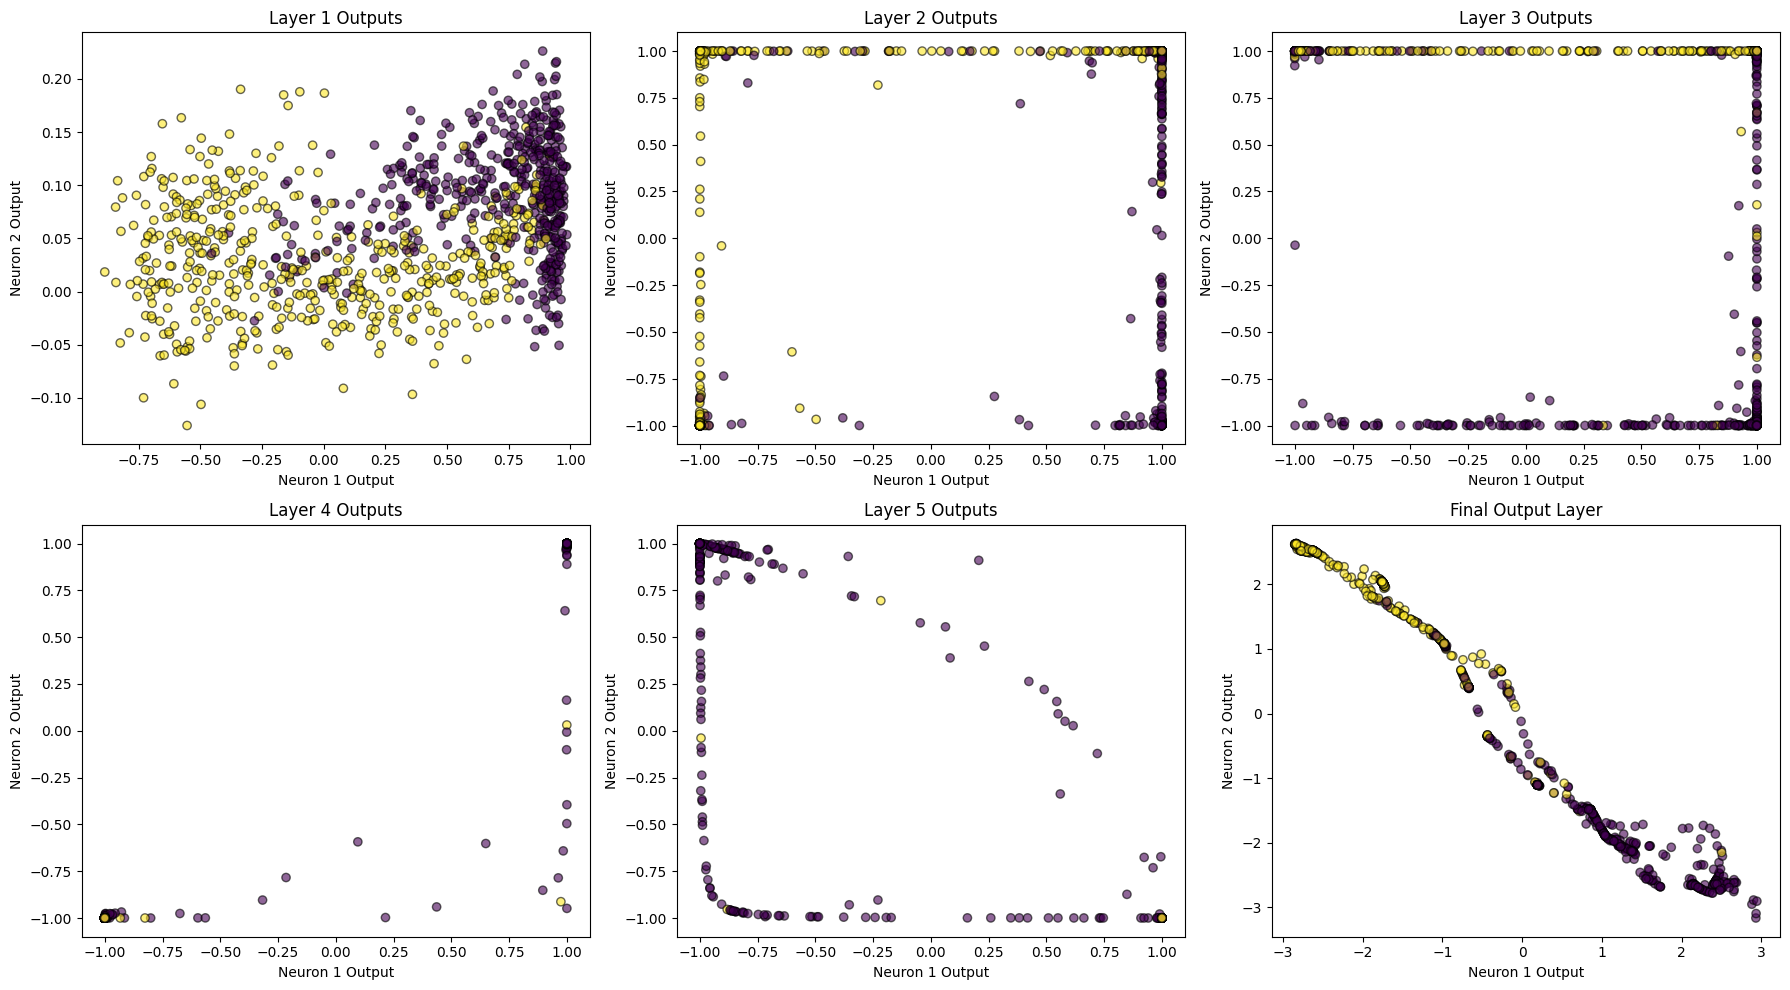

Test Accuracy with Deeper Network: 0.89
Decision Boundary for Deeper KAN-like Network:


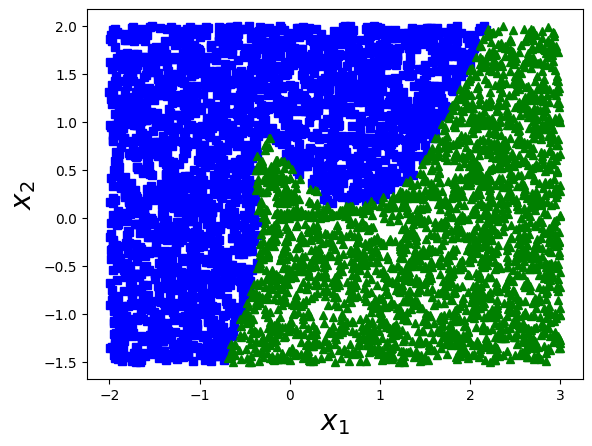

In [42]:
# 1- Generating the dataset
X, Y = make_moons(n_samples=1000, noise=0.3, random_state=14)
X_test, Y_test = make_moons(n_samples=500, noise=0.3, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32)
Y_train = torch.tensor(Y, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.long)

# 2- Define a deeper KAN-like neural network using PyTorch
class KANLikeNetworkDeeper(nn.Module):
    def __init__(self):
        super(KANLikeNetworkDeeper, self).__init__()
        # Define the layers of the network
        self.layer1 = nn.Linear(2, 64)
        self.layer2 = nn.Linear(64, 64)
        self.layer3 = nn.Linear(64, 64)
        self.layer4 = nn.Linear(64, 64)
        self.layer5 = nn.Linear(64, 64)
        self.layer6 = nn.Linear(64, 2)
        
    def forward(self, x):
        # Apply transformations that mimic univariate representations
        x = torch.tanh(self.layer1(x))  # Apply non-linearity after first layer
        self.layer1_output = x.detach().numpy()  # Store the output after layer1 for visualization
        x = torch.tanh(self.layer2(x))  # Second layer transformation
        self.layer2_output = x.detach().numpy()  # Store the output after layer2 for visualization
        x = torch.tanh(self.layer3(x))  # Third layer transformation
        self.layer3_output = x.detach().numpy()  # Store the output after layer3 for visualization
        x = torch.tanh(self.layer4(x))  # Fourth layer transformation
        self.layer4_output = x.detach().numpy()  # Store the output after layer4 for visualization
        x = torch.tanh(self.layer5(x))  # Fifth layer transformation
        self.layer5_output = x.detach().numpy()  # Store the output after layer5 for visualization
        x = self.layer6(x)  # Output layer (linear)
        self.output = x.detach().numpy()
        return x

# 3- Instantiate the deeper model, define loss function and optimizer
model_deeper = KANLikeNetworkDeeper()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deeper.parameters(), lr=0.01)

# 4- Train the deeper model
epochs = 100
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    model_deeper.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model_deeper(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# 5- Visualize the layer outputs
def visualize_layer_outputs(model, X, Y):
    model.eval()
    with torch.no_grad():
        model(X)  # Forward pass to store intermediate outputs

    fig, ax = plt.subplots(2, 3, figsize=(18, 10))
    
    ax[0, 0].scatter(model.layer1_output[:, 0], model.layer1_output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[0, 0].set_title('Layer 1 Outputs')
    ax[0, 0].set_xlabel('Neuron 1 Output')
    ax[0, 0].set_ylabel('Neuron 2 Output')

    ax[0, 1].scatter(model.layer2_output[:, 0], model.layer2_output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[0, 1].set_title('Layer 2 Outputs')
    ax[0, 1].set_xlabel('Neuron 1 Output')
    ax[0, 1].set_ylabel('Neuron 2 Output')

    ax[0, 2].scatter(model.layer3_output[:, 0], model.layer3_output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[0, 2].set_title('Layer 3 Outputs')
    ax[0, 2].set_xlabel('Neuron 1 Output')
    ax[0, 2].set_ylabel('Neuron 2 Output')

    ax[1, 0].scatter(model.layer4_output[:, 0], model.layer4_output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[1, 0].set_title('Layer 4 Outputs')
    ax[1, 0].set_xlabel('Neuron 1 Output')
    ax[1, 0].set_ylabel('Neuron 2 Output')

    ax[1, 1].scatter(model.layer5_output[:, 0], model.layer5_output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[1, 1].set_title('Layer 5 Outputs')
    ax[1, 1].set_xlabel('Neuron 1 Output')
    ax[1, 1].set_ylabel('Neuron 2 Output')

    ax[1, 2].scatter(model.output[:, 0], model.output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[1, 2].set_title('Final Output Layer')
    ax[1, 2].set_xlabel('Neuron 1 Output')
    ax[1, 2].set_ylabel('Neuron 2 Output')

    plt.tight_layout()
    plt.show()

# Visualize the outputs after each layer
print("Visualizing Layer Outputs for Deeper Network:")
visualize_layer_outputs(model_deeper, X_train, Y_train)

# 6- Evaluate the deeper model on the test set
model_deeper.eval()
with torch.no_grad():
    test_outputs = model_deeper(X_test)
    _, predicted = torch.max(test_outputs, 1)
    test_accuracy = accuracy_score(Y_test, predicted)
    print(f"Test Accuracy with Deeper Network: {test_accuracy:.2f}")

# 7- Visualize the decision boundary
def plot_decision_boundary(model, X, Y):
    n = 5000
    xy_min = [-2, -1.5]
    xy_max = [3, 2]
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n, 2))
    
    data_tensor = torch.tensor(data, dtype=torch.float32)
    with torch.no_grad():
        Yhat_new = model(data_tensor)
        _, Yhat_new = torch.max(Yhat_new, 1)
        Yhat_new = Yhat_new.numpy()
    
    # When the label y is 0, the class is represented with a blue square.
    # When the label y is 1, the class is represented with a green triangle.
    plt.plot(data[:, 0][Yhat_new == 0], data[:, 1][Yhat_new == 0], "bs")
    plt.plot(data[:, 0][Yhat_new == 1], data[:, 1][Yhat_new == 1], "g^")
    
    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

print("Decision Boundary for Deeper KAN-like Network:")
plot_decision_boundary(model_deeper, X, Y)

Since too many layers can make it hard to interepret how each neuron accumulates to the final results, let's see if we can visualize it in a more simpler network.

Epoch [10/100], Loss: 0.3568
Epoch [20/100], Loss: 0.3459
Epoch [30/100], Loss: 0.3426
Epoch [40/100], Loss: 0.3509
Epoch [50/100], Loss: 0.3416
Epoch [60/100], Loss: 0.3493
Epoch [70/100], Loss: 0.3477
Epoch [80/100], Loss: 0.3437
Epoch [90/100], Loss: 0.3524
Epoch [100/100], Loss: 0.3519
Visualizing Transformations for Simpler Network:


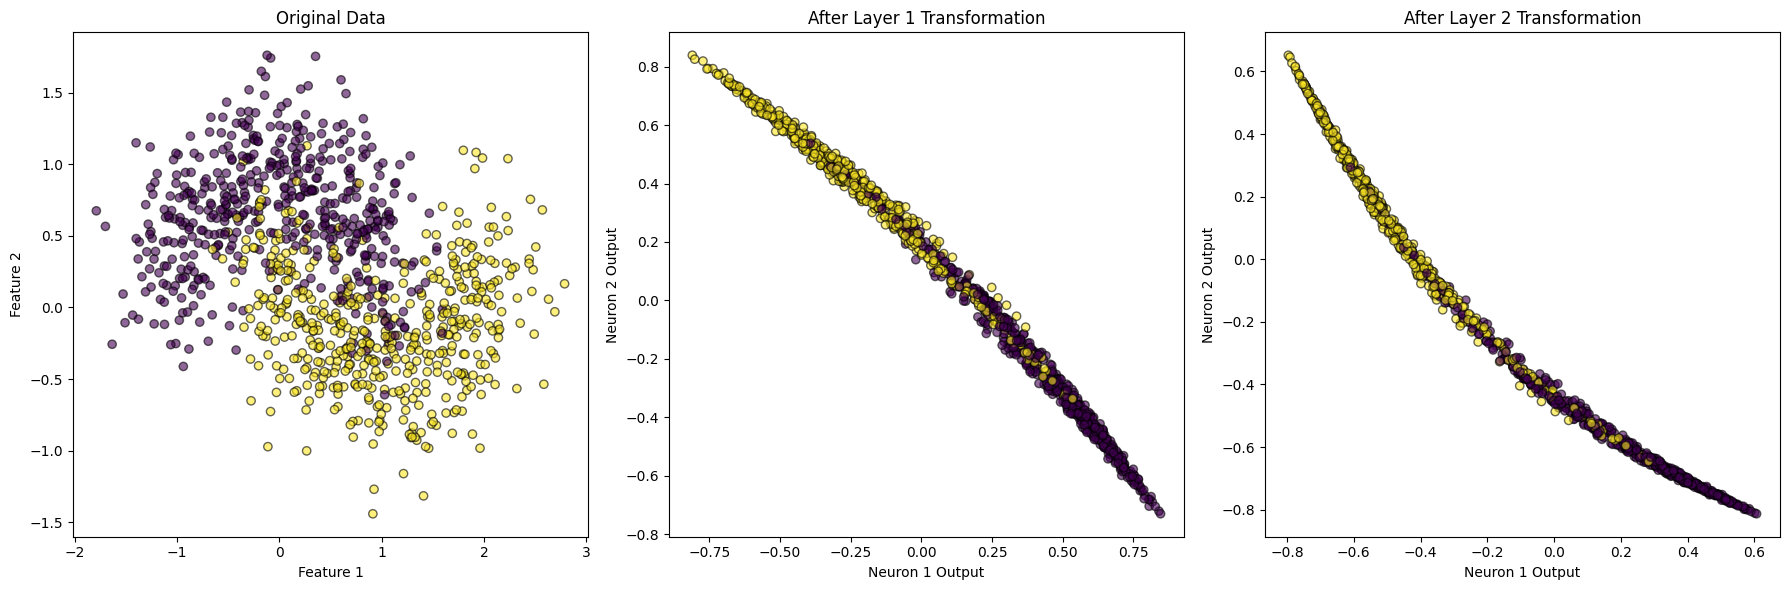

Test Accuracy with Simpler Network: 0.84
Decision Boundary for Simpler KAN-like Network:


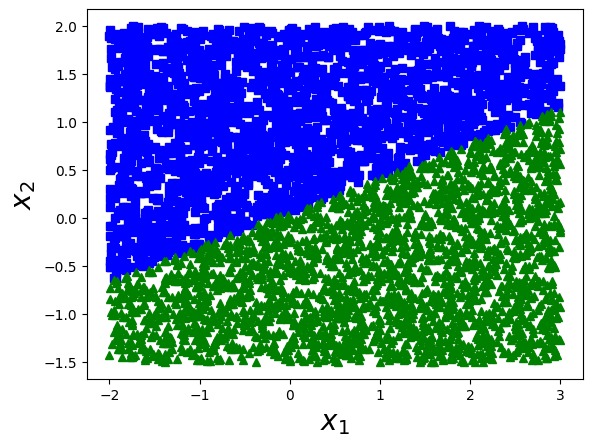

In [43]:
# 1- Generating the dataset
X, Y = make_moons(n_samples=1000, noise=0.3, random_state=14)
X_test, Y_test = make_moons(n_samples=500, noise=0.3, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32)
Y_train = torch.tensor(Y, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.long)

# 2- Define a simpler KAN-like neural network with 2 layers and 2 neurons each
class KANLikeNetworkSimple(nn.Module):
    def __init__(self):
        super(KANLikeNetworkSimple, self).__init__()
        # Define the layers of the network
        self.layer1 = nn.Linear(2, 2)  # 2 input features to 2 neurons
        self.layer2 = nn.Linear(2, 2)  # 2 neurons to 2 neurons
        self.output_layer = nn.Linear(2, 2)  # 2 neurons to 2 output classes
        
    def forward(self, x):
        # Apply transformations
        x = torch.tanh(self.layer1(x))  # Apply non-linearity after first layer
        self.layer1_output = x.detach().numpy()  # Store the output after layer1 for visualization
        x = torch.tanh(self.layer2(x))  # Second layer transformation
        self.layer2_output = x.detach().numpy()  # Store the output after layer2 for visualization
        x = self.output_layer(x)  # Output layer (linear)
        self.final_output = x.detach().numpy()
        return x

# 3- Instantiate the simpler model, define loss function and optimizer
model_simple = KANLikeNetworkSimple()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_simple.parameters(), lr=0.01)

# 4- Train the simpler model
epochs = 100
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    model_simple.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model_simple(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# 5- Visualize the transformations at each layer
def visualize_transformations(model, X, Y):
    model.eval()
    with torch.no_grad():
        model(X)  # Forward pass to store intermediate outputs

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Plot original data
    ax[0].scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[0].set_title('Original Data')
    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Feature 2')

    # Plot transformation after first layer
    ax[1].scatter(model.layer1_output[:, 0], model.layer1_output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[1].set_title('After Layer 1 Transformation')
    ax[1].set_xlabel('Neuron 1 Output')
    ax[1].set_ylabel('Neuron 2 Output')

    # Plot transformation after second layer
    ax[2].scatter(model.layer2_output[:, 0], model.layer2_output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[2].set_title('After Layer 2 Transformation')
    ax[2].set_xlabel('Neuron 1 Output')
    ax[2].set_ylabel('Neuron 2 Output')

    plt.tight_layout()
    plt.show()

print("Visualizing Transformations for Simpler Network:")
visualize_transformations(model_simple, X_train, Y_train)

# 6- Evaluate the simpler model on the test set
model_simple.eval()
with torch.no_grad():
    test_outputs = model_simple(X_test)
    _, predicted = torch.max(test_outputs, 1)
    test_accuracy = accuracy_score(Y_test, predicted)
    print(f"Test Accuracy with Simpler Network: {test_accuracy:.2f}")

# 7- Visualize the decision boundary
def plot_decision_boundary(model, X, Y):
    n = 5000
    xy_min = [-2, -1.5]
    xy_max = [3, 2]
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n, 2))
    
    data_tensor = torch.tensor(data, dtype=torch.float32)
    with torch.no_grad():
        Yhat_new = model(data_tensor)
        _, Yhat_new = torch.max(Yhat_new, 1)
        Yhat_new = Yhat_new.numpy()
    
    # When the label y is 0, the class is represented with a blue square.
    # When the label y is 1, the class is represented with a green triangle.
    plt.plot(data[:, 0][Yhat_new == 0], data[:, 1][Yhat_new == 0], "bs")
    plt.plot(data[:, 0][Yhat_new == 1], data[:, 1][Yhat_new == 1], "g^")
    
    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

    # Displaying the plot.
    plt.show()

print("Decision Boundary for Simpler KAN-like Network:")
plot_decision_boundary(model_simple, X, Y)

Because each layer in this simple KAN-like model has only 2 neurons, we can directly plot their output in a 2-dimensional space to visualize how the data is being transformed.

Layer 1: The first hidden layer with 2 neurons applies a linear transformation (a linear combination of inputs) followed by a non-linear activation function (tanh). This layer learns to map the original 2D input space into a new 2D representation.

Layer 2: The second hidden layer, also with 2 neurons, takes the output of the first layer and applies another linear transformation followed by a non-linear activation. This again transforms the 2D representation from the first layer into a new 2D representation.

The original concept of a Kolmogorov-Arnold Network (KAN) involves representing a complex multivariate function as a sum of continuous functions of fewer variables.

In our simplified neural network:

Each layer's output is not explicitly summed in the way the original KAN theorem suggests (where multiple univariate functions are summed). However, the network architecture with fully connected layers and non-linear activations allows it to approximate such summations.
In this network, the layers are composed in a sequence, not explicitly summed. Each layer's output becomes the input for the next layer. However, if you look at the entire network from input to output, you can think of it as a series of transformations that ultimately aim to capture a complex function mapping from input to output.

Epoch [10/100], Loss: 0.3551
Epoch [20/100], Loss: 0.3516
Epoch [30/100], Loss: 0.3462
Epoch [40/100], Loss: 0.3482
Epoch [50/100], Loss: 0.3428
Epoch [60/100], Loss: 0.3490
Epoch [70/100], Loss: 0.3407
Epoch [80/100], Loss: 0.3348
Epoch [90/100], Loss: 0.3390
Epoch [100/100], Loss: 0.3298
Visualizing Transformations for Simpler Network:


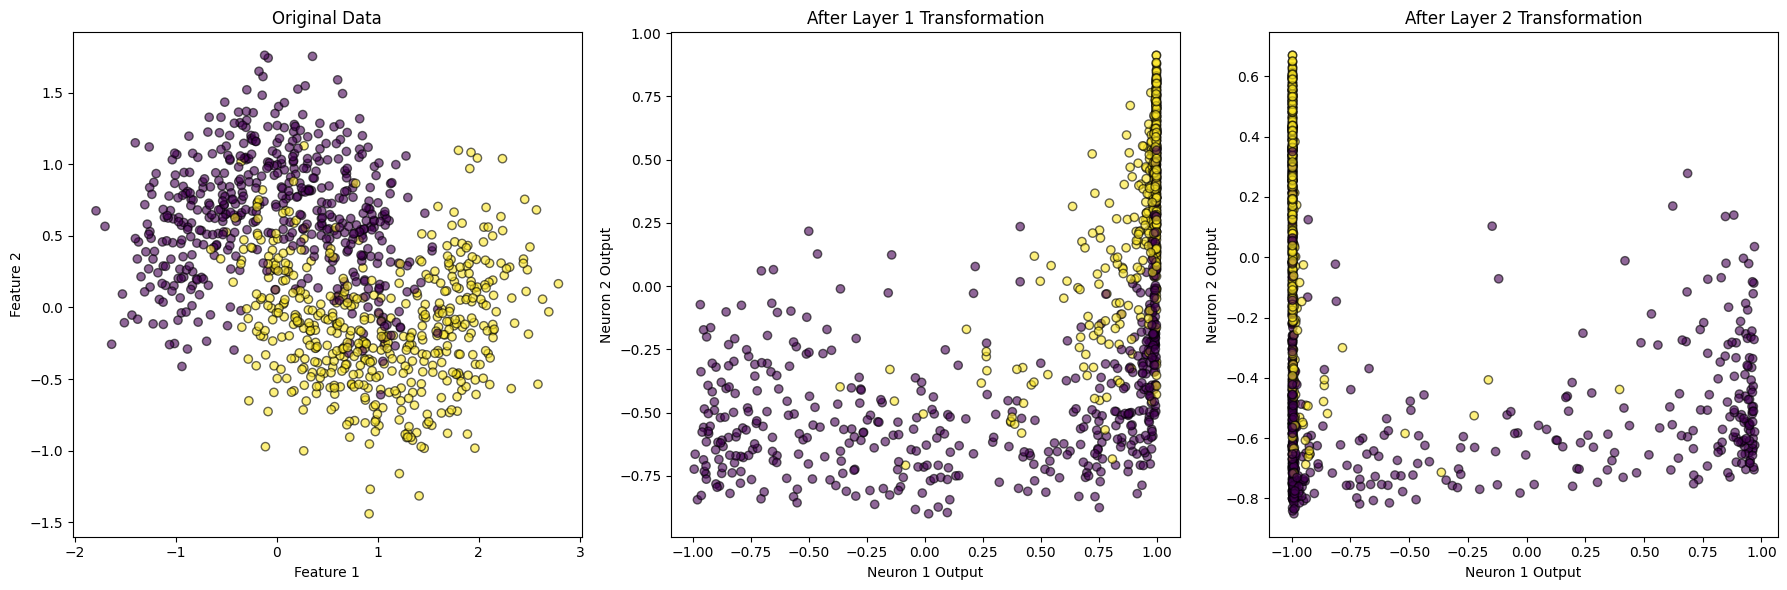

Test Accuracy with Simpler Network: 0.85
Decision Boundary for Simpler KAN-like Network:


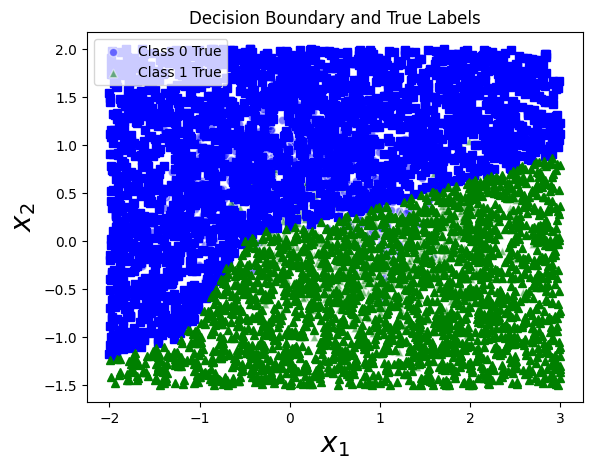

In [44]:
# 1- Generating the dataset
X, Y = make_moons(n_samples=1000, noise=0.3, random_state=14)
X_test, Y_test = make_moons(n_samples=500, noise=0.3, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32)
Y_train = torch.tensor(Y, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.long)

# 2- Define a simpler KAN-like neural network with 2 layers and 2 neurons each
class KANLikeNetworkSimple(nn.Module):
    def __init__(self):
        super(KANLikeNetworkSimple, self).__init__()
        # Define the layers of the network
        self.layer1 = nn.Linear(2, 2)  # 2 input features to 2 neurons
        self.layer2 = nn.Linear(2, 2)  # 2 neurons to 2 neurons
        self.output_layer = nn.Linear(2, 2)  # 2 neurons to 2 output classes
        
    def forward(self, x):
        # Apply transformations
        x = torch.tanh(self.layer1(x))  # Apply non-linearity after first layer
        self.layer1_output = x.detach().numpy()  # Store the output after layer1 for visualization
        x = torch.tanh(self.layer2(x))  # Second layer transformation
        self.layer2_output = x.detach().numpy()  # Store the output after layer2 for visualization
        x = self.output_layer(x)  # Output layer (linear)
        self.final_output = x.detach().numpy()
        return x

# 3- Instantiate the simpler model, define loss function and optimizer
model_simple = KANLikeNetworkSimple()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_simple.parameters(), lr=0.01)

# 4- Train the simpler model
epochs = 100
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    model_simple.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model_simple(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# 5- Visualize the transformations at each layer
def visualize_transformations(model, X, Y):
    model.eval()
    with torch.no_grad():
        model(X)  # Forward pass to store intermediate outputs

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Plot original data
    ax[0].scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[0].set_title('Original Data')
    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Feature 2')

    # Plot transformation after first layer
    ax[1].scatter(model.layer1_output[:, 0], model.layer1_output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[1].set_title('After Layer 1 Transformation')
    ax[1].set_xlabel('Neuron 1 Output')
    ax[1].set_ylabel('Neuron 2 Output')

    # Plot transformation after second layer
    ax[2].scatter(model.layer2_output[:, 0], model.layer2_output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[2].set_title('After Layer 2 Transformation')
    ax[2].set_xlabel('Neuron 1 Output')
    ax[2].set_ylabel('Neuron 2 Output')

    plt.tight_layout()
    plt.show()

print("Visualizing Transformations for Simpler Network:")
visualize_transformations(model_simple, X_train, Y_train)

# 6- Evaluate the simpler model on the test set
model_simple.eval()
with torch.no_grad():
    test_outputs = model_simple(X_test)
    _, predicted = torch.max(test_outputs, 1)
    test_accuracy = accuracy_score(Y_test, predicted)
    print(f"Test Accuracy with Simpler Network: {test_accuracy:.2f}")

# 7- Visualize the decision boundary
def plot_decision_boundary(model, X, Y):
    n = 5000
    xy_min = [-2, -1.5]
    xy_max = [3, 2]
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n, 2))
    
    data_tensor = torch.tensor(data, dtype=torch.float32)
    with torch.no_grad():
        Yhat_new = model(data_tensor)
        _, Yhat_new = torch.max(Yhat_new, 1)
        Yhat_new = Yhat_new.numpy()
    
    # When the label y is 0, the class is represented with a blue square.
    # When the label y is 1, the class is represented with a green triangle.
    plt.plot(data[:, 0][Yhat_new == 0], data[:, 1][Yhat_new == 0], "bs")
    plt.plot(data[:, 0][Yhat_new == 1], data[:, 1][Yhat_new == 1], "g^")
    
    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)
    
    # Plot the true labels for comparison
    plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], color='blue', edgecolor='w', marker='o', alpha=0.5, label='Class 0 True')
    plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], color='green', edgecolor='w', marker='^', alpha=0.5, label='Class 1 True')
    plt.legend()

    # Displaying the plot.
    plt.title("Decision Boundary and True Labels")
    plt.show()

print("Decision Boundary for Simpler KAN-like Network:")
plot_decision_boundary(model_simple, X, Y)

Now, let's forget our implementation of this simplified neural network, and try out as it was implemented/suggested on the paper (https://arxiv.org/abs/2404.19756).

Epoch [10/100], Loss: 0.4417
Epoch [20/100], Loss: 0.3773
Epoch [30/100], Loss: 0.3486
Epoch [40/100], Loss: 0.3351
Epoch [50/100], Loss: 0.3340
Epoch [60/100], Loss: 0.3309
Epoch [70/100], Loss: 0.3368
Epoch [80/100], Loss: 0.3420
Epoch [90/100], Loss: 0.3359
Epoch [100/100], Loss: 0.3376
Visualizing Transformations for KAN-like Network with Explicit Summation:


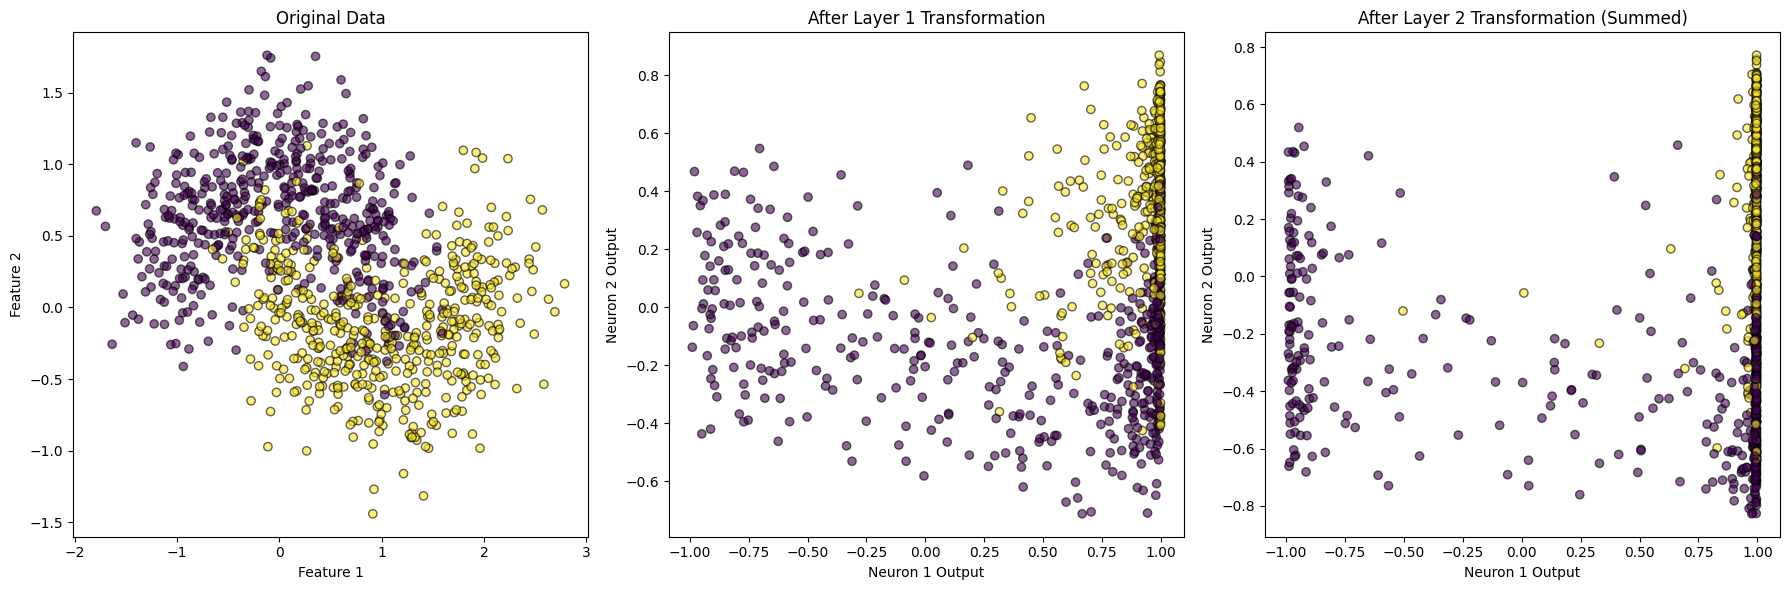

Test Accuracy with KAN-like Network: 0.86
Decision Boundary for KAN-like Network with Explicit Summation:


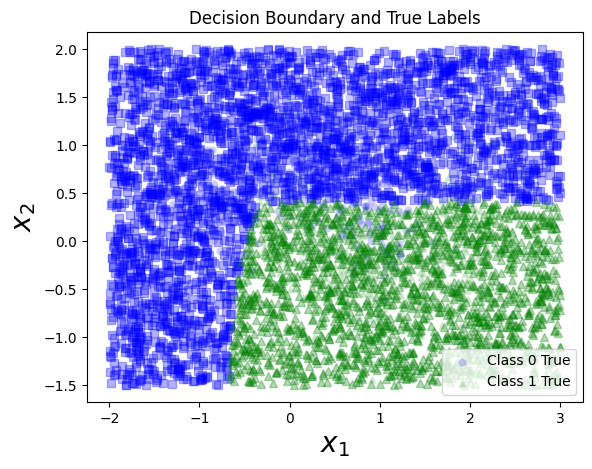

In [45]:
# 1- Generating the dataset
X, Y = make_moons(n_samples=1000, noise=0.3, random_state=14)
X_test, Y_test = make_moons(n_samples=500, noise=0.3, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32)
Y_train = torch.tensor(Y, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.long)

# 2- Define a KAN-like network with explicit summation
class KANExplicitSummation(nn.Module):
    def __init__(self):
        super(KANExplicitSummation, self).__init__()
        # Define neurons as individual layers to apply explicit summation
        self.neuron1_layer1 = nn.Linear(1, 1)  # Neuron 1 in Layer 1
        self.neuron2_layer1 = nn.Linear(1, 1)  # Neuron 2 in Layer 1

        self.neuron1_layer2 = nn.Linear(1, 1)  # Neuron 1 in Layer 2
        self.neuron2_layer2 = nn.Linear(1, 1)  # Neuron 2 in Layer 2

        self.output_layer = nn.Linear(2, 2)  # Final output layer (2 neurons to 2 output classes)
        
    def forward(self, x):
        # Split the input into two single feature inputs
        x1 = x[:, 0:1]  # First feature as input to neuron 1
        x2 = x[:, 1:2]  # Second feature as input to neuron 2
        
        # Apply univariate transformations (Layer 1)
        out1_layer1 = torch.tanh(self.neuron1_layer1(x1))  # Neuron 1 in Layer 1
        out2_layer1 = torch.tanh(self.neuron2_layer1(x2))  # Neuron 2 in Layer 1
        
        # Apply univariate transformations (Layer 2)
        out1_layer2 = torch.tanh(self.neuron1_layer2(out1_layer1))  # Neuron 1 in Layer 2
        out2_layer2 = torch.tanh(self.neuron2_layer2(out2_layer1))  # Neuron 2 in Layer 2
        
        # Sum the outputs to follow KAN theorem
        summed_output = torch.cat((out1_layer2, out2_layer2), dim=1)
        
        # Final output layer
        output = self.output_layer(summed_output)
        
        # Store intermediate outputs for visualization
        self.layer1_output = torch.cat((out1_layer1, out2_layer1), dim=1).detach().numpy()
        self.layer2_output = summed_output.detach().numpy()
        self.final_output = output.detach().numpy()

        return output

# 3- Instantiate the KAN-like model, define loss function and optimizer
model_kan = KANExplicitSummation()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_kan.parameters(), lr=0.01)

# 4- Train the KAN-like model
epochs = 100
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    model_kan.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model_kan(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

# 5- Visualize the transformations at each layer
def visualize_transformations(model, X, Y):
    model.eval()
    with torch.no_grad():
        model(X)  # Forward pass to store intermediate outputs

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Plot original data
    ax[0].scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[0].set_title('Original Data')
    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Feature 2')

    # Plot transformation after first layer
    ax[1].scatter(model.layer1_output[:, 0], model.layer1_output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[1].set_title('After Layer 1 Transformation')
    ax[1].set_xlabel('Neuron 1 Output')
    ax[1].set_ylabel('Neuron 2 Output')

    # Plot transformation after second layer
    ax[2].scatter(model.layer2_output[:, 0], model.layer2_output[:, 1], c=Y, cmap='viridis', edgecolor='k', alpha=0.6)
    ax[2].set_title('After Layer 2 Transformation (Summed)')
    ax[2].set_xlabel('Neuron 1 Output')
    ax[2].set_ylabel('Neuron 2 Output')

    plt.tight_layout()
    plt.show()

print("Visualizing Transformations for KAN-like Network with Explicit Summation:")
visualize_transformations(model_kan, X_train, Y_train)

# 6- Evaluate the KAN-like model on the test set
model_kan.eval()
with torch.no_grad():
    test_outputs = model_kan(X_test)
    _, predicted = torch.max(test_outputs, 1)
    test_accuracy = accuracy_score(Y_test, predicted)
    print(f"Test Accuracy with KAN-like Network: {test_accuracy:.2f}")

# 7- Visualize the decision boundary
def plot_decision_boundary(model, X, Y):
    n = 5000
    xy_min = [-2, -1.5]
    xy_max = [3, 2]
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n, 2))
    
    data_tensor = torch.tensor(data, dtype=torch.float32)
    with torch.no_grad():
        Yhat_new = model(data_tensor)
        _, Yhat_new = torch.max(Yhat_new, 1)
        Yhat_new = Yhat_new.numpy()
    
    # When the label y is 0, the class is represented with a blue square.
    # When the label y is 1, the class is represented with a green triangle.
    plt.plot(data[:, 0][Yhat_new == 0], data[:, 1][Yhat_new == 0], "bs", alpha=0.3)
    plt.plot(data[:, 0][Yhat_new == 1], data[:, 1][Yhat_new == 1], "g^", alpha=0.3)
    
    # X contains two features, x1 and x2
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)
    
    # Plot the true labels for comparison
    plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], color='blue', edgecolor='w', marker='o', alpha=0.2, label='Class 0 True')
    plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], color='green', edgecolor='w', marker='^', alpha=0.2, label='Class 1 True')
    plt.legend()

    # Displaying the plot.
    plt.title("Decision Boundary and True Labels")
    plt.show()

print("Decision Boundary for KAN-like Network with Explicit Summation:")
plot_decision_boundary(model_kan, X, Y)

Now, let's discuss about the functioning and interpretation of KANs.

Let's walk through the interpretation of each step, moving from the **Original Data** plot to the final **Decision Boundary and True Labels** plot. Each plot represents a stage in the transformation process that the **KAN-like network** (Kolmogorov-Arnold Network with explicit summation) applies to the data to learn how to classify it correctly.

###### 1. **Original Data Plot**

- **What it Shows**: 
  - This plot displays the original **Two Moons** dataset in its raw form. The two features (x0 and x1) are plotted on the x and y axes, respectively. Each point represents an instance in the dataset, with color indicating the true class label (Class 0 or Class 1).
  - **Class 0** points are usually represented in one color (e.g., blue), and **Class 1** points are represented in another color (e.g., green).

- **Interpretation**: 
  - This plot provides a baseline view of the data as it is input to the network. The dataset has a non-linear shape, with two interleaving "moon" shapes, making it challenging for simple linear classifiers to separate the classes accurately.
  - The model will try to transform this input space into a new representation where the classes are more linearly separable.

###### 2. **After Layer 1 Transformation Plot**

- **What it Shows**: 
  - This plot shows the transformed representation of the data after it passes through the **first hidden layer** of the network.
  - Each neuron in the first layer applies a univariate transformation (e.g., a linear transformation followed by a non-linear activation function, like `tanh`).

- **Interpretation**: 
  - The first layer attempts to learn simple, non-linear transformations that start to separate the classes. 
  - After passing through this layer, the data points may have been shifted, stretched, or compressed in the feature space, reflecting how each neuron's activation function processes the input data.
  - If the first layer learns effective transformations, we may already begin to see some separation of the classes in this plot.

###### 3. **After Layer 2 Transformation (Summed) Plot**

- **What it Shows**: 
  - This plot represents the output after the **second hidden layer**. Here, the network continues to transform the data with another set of univariate transformations.
  - The outputs of the neurons in the second layer are explicitly **summed** to follow the KAN theorem's principle that complex functions can be represented as a sum of simpler, univariate functions.

- **Interpretation**: 
  - The summed transformations after the second layer represent the combined effect of all the transformations applied by the network so far.
  - This layer tries to refine the separation achieved in the first layer, adjusting the data representation further to make the classes more linearly separable in the new feature space.
  - By summing the outputs, the network effectively combines the learned features, creating a representation that should make the classification task easier for the final layer.
  - If this summation is effective, we should see clearer separation between the classes in this plot.

###### 4. **Decision Boundary and True Labels Plot**

- **What it Shows**: 
  - This final plot visualizes the **decision boundary** learned by the network overlaid with the **true class labels**.
  - The decision boundary is generated by evaluating the trained network on a grid of points across the feature space and plotting where the network classifies points as belonging to Class 0 or Class 1.
  - The true labels of the training data points are also shown for comparison.

- **Interpretation**: 
  - This plot allows us to assess the model's performance visually. The decision boundary indicates how the network separates the feature space into regions corresponding to each class.
  - Ideally, the decision boundary should align well with the underlying data distribution, correctly classifying most points.
  - If the boundary correctly separates the two "moons" with minimal overlap, it indicates that the network has successfully learned to distinguish the classes.
  - The effectiveness of the learned transformations can be judged by how closely the decision boundary follows the true labels' distribution. Misalignment or excessive overlap might suggest that the network needs further tuning or that it has not yet learned the optimal representation.

By analyzing each step, we can understand how each layer contributes to the overall task of classification and how well the network approximates the decision function needed to separate the data.

-----------------

###### Similarities Between the Plots

1. **Transformation Representation**:
   - The **"After Layer 2 Transformation (Summed)"** plot represents the data after it has been transformed by all layers in the hidden part of the network. This transformation is crucial because it directly influences the final decision boundary.
   - The transformed space should ideally align points of the same class more closely and separate points of different classes more distinctly.

2. **Linear Separability**:
   - If the transformations learned by the hidden layers (first and second layers) are effective, the summed output from the second layer should present the data in a way that the classes are more linearly separable.
   - The **final output layer** applies a linear transformation to this summed output, which means if the summed outputs already make the classes nearly linearly separable, the decision boundary derived from the final output will look similar.

###### Differences Between the Plots

1. **Final Linear Transformation**:
   - The **final output layer** is a linear layer that maps the summed outputs to class scores (logits). Even though this is a linear transformation, it can still slightly alter the representation learned by the summed outputs.
   - This means while the **"After Layer 2 Transformation (Summed)"** plot provides a transformed representation, the final plot reflects the actual decision boundary as determined by the final linear transformation applied to those summed outputs.

2. **Decision Boundary vs. Data Representation**:
   - The **"After Layer 2 Transformation (Summed)"** plot is purely a visualization of how the data points are positioned after the network's transformations.
   - The **"Decision Boundary and True Labels"** plot not only reflects this transformed representation but also directly shows how the network uses this representation to classify new points in space. The decision boundary is drawn based on the model's output after applying all learned transformations.

3. **Effect of Bias and Final Weights**:
   - The final output layer has its own weights and biases. The decision boundary plot takes these into account, which can lead to slight differences. 
   - Depending on how these final weights and biases interact with the transformed data, the decision boundary can shift or rotate slightly compared to the visual representation of the second-layer output.

###### Conclusion

While the **"After Layer 2 Transformation (Summed)"** plot and the **"Decision Boundary and True Labels"** plot should be quite similar, particularly if the summed output from the second layer is already well-aligned for classification, they are not exactly the same:

- The summed output plot provides an intermediate representation of the data.
- The decision boundary plot shows how the network classifies data in this space after applying the final linear transformation.

In practice, the two plots will often look similar, especially if the network is simple and the final layer does not significantly alter the representation. However, subtle differences may arise due to the final transformation and the way the decision boundary is calculated from the logits, just like we see in the problem above.